In [1]:
%matplotlib inline
import sys
#sys.path.append('/home/sylvain/dev/SylvainCorlay/mesh/pymesh/bin/Release')

import pymesh
import numpy

In [2]:
dim = 2
points = numpy.random.randn(100, dim)
mesh = pymesh.Mesh(points)

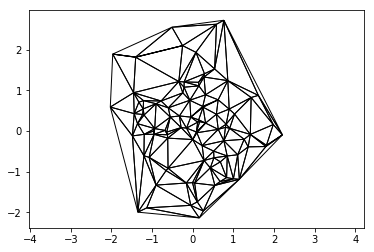

In [3]:
import matplotlib.pyplot as plt
plt.axis('equal')
for simplex in mesh:
    l = simplex.lines().T
    plt.fill(l[0], l[1], fill=False)

In [4]:
%%timeit
mesh = pymesh.Mesh(points)

1000 loops, best of 3: 769 µs per loop


In [5]:
values = points[:, 0] ** 2 + points[:, 1] ** 2
nb_eval = 200
other_points = numpy.random.randn(nb_eval, dim)
interpolated_values = numpy.zeros(nb_eval)

mesh.set_values(values)
mesh.interpolate(other_points, interpolated_values)

In [6]:
pymesh.Mesh.

pymesh.Simplex

## TODO:

### C++

- new version of the building of graph structure for newly created simplices
- docstrings in all the places.
- merge face_ref and path_to_face? (use the latter all the time?)
  We may not always have the actual iterator on the path_to_face.

### Python interface

- Simplex Python interface should not create a copy of the points.

- A wrapper for the point type (or the view on the point type)

- Use indexing suite for list of points of simplex

- Use indexing suite for simplex graph structure.

- the visibility walks should have an interface of iterator? How to stop iteration in Python (when we return current in the current version of the code)

- Should there be a difference for the user between the reference on the pointed simplex and the pointed simplex? (then if no use an infinite simplex instead of dummy?)
      
- How to bind the point views of the simplex to indices in an original container?
    1 - have the view_type behave like a point but have also methods to compare with other view types
    (ie store the index internally?)
- A wrapper for the face

- Data structure for Voronoi cell
    - there is one Voronoi cell per point.
    - the easiest way to draw boundaries of Voronoi diagram is to bind the circumcenters of Delaunay triangles


### Build
- what is the best directory for binaries
- makefile?

### Anotated source

- Make figure explaining the different aspects to these algos. What is the best way of creating anotated sources?
- Start drawing the figures on paper

```C++
pool_type m_pool;
std::list<ptr_type> m_used_list;
std::list<ptr_type> m_free_list;

inline iterator create(unsigned int d)
{  // allocate a new object, return an iterator on it
    if (m_free_list.empty())
    {
        // TODO: use placement new.
        object_type t(d);
        m_pool.push_back(t);
        ptr_type it = m_pool.end();
        --it;
        m_used_list.push_back(it);
        return iterator(--m_used_list.end());
    }
    else
    {
        m_used_list.push_back(m_free_list.front());
        // inplace destructor call and placement new
        (*(m_used_list.back())).~object_type();
        new (&(*(m_used_list.back()))) object_type(d);
        m_free_list.pop_front();
        return iterator(--m_used_list.end());
    }
}

inline void destroy(iterator& it)
{  // free the place it
    m_free_list.push_back(*(it._address()));
    m_used_list.erase(it._address());
}
```

```
delete  = - free_list.push_back(address)
          - used_list.erase(address)
```